<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/info371_week10_cyber_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   duration_sec   bytes_sent  bytes_received  packets_sent  packets_received  \
0     74.901425  3342.009978     8892.471542            24                26   
1     55.852071  3879.637920     4694.586690            36                41   
2     79.430656  6494.587210     9174.014800            32                36   
3    105.690896  6220.740531    10389.094647            32                37   
4     52.975399  4958.196812     8033.587258            35                32   

   failed_connections  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


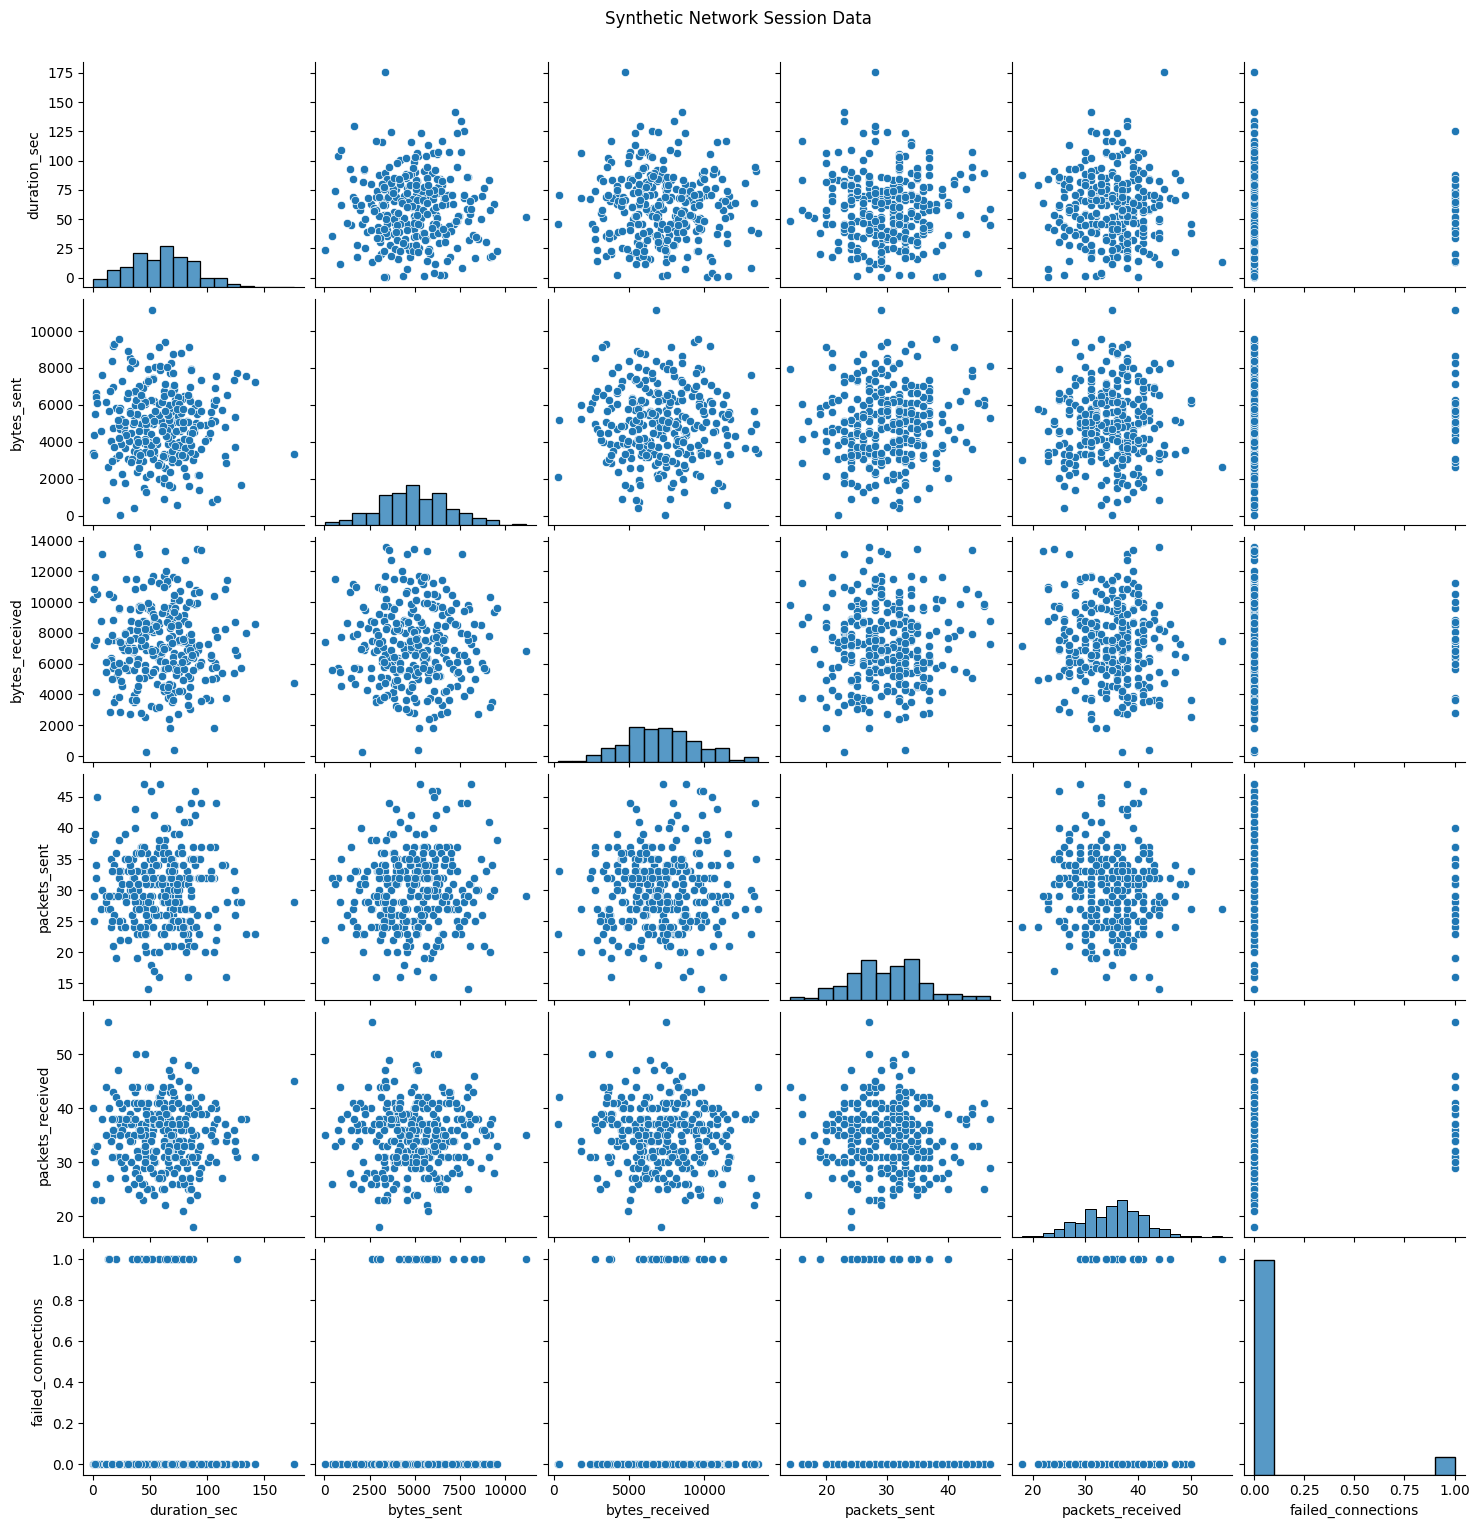

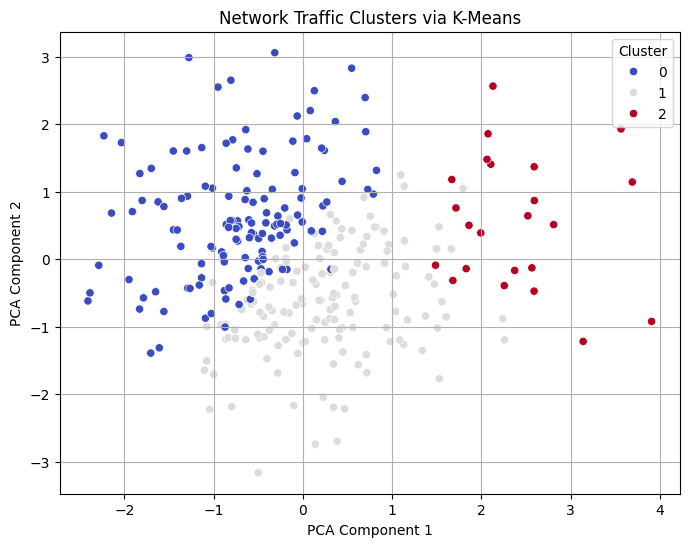


🛡️ Cluster Centers (typical session profiles):
   duration_sec  bytes_sent  bytes_received  packets_sent  packets_received  \
0          64.4      5135.3          8506.0          32.3              31.1   
1          56.7      4677.6          5982.9          28.0              37.8   
2          58.8      5695.3          7449.3          29.3              37.0   

   failed_connections  
0                -0.0  
1                -0.0  
2                 1.0  


In [4]:
# 🔐 K-Means Clustering for Network Traffic Segmentation
# Sector: Cybersecurity
# Goal: Identify patterns in network session data, possibly flag anomalies

# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 🧪 Generate Synthetic Network Traffic Dataset
np.random.seed(42)
n_sessions = 300

# Features: duration_sec, bytes_sent, bytes_received, packets_sent, packets_received, failed_connections
duration = np.abs(np.random.normal(60, 30, n_sessions))
bytes_sent = np.abs(np.random.normal(5000, 2000, n_sessions))
bytes_received = np.abs(np.random.normal(7000, 2500, n_sessions))
packets_sent = np.random.poisson(30, n_sessions)
packets_received = np.random.poisson(35, n_sessions)
failed_connections = np.random.binomial(1, 0.05, n_sessions)  # mostly 0s, some 1s

# 🧾 Create DataFrame
df = pd.DataFrame({
    'duration_sec': duration,
    'bytes_sent': bytes_sent,
    'bytes_received': bytes_received,
    'packets_sent': packets_sent,
    'packets_received': packets_received,
    'failed_connections': failed_connections
})

# 🔍 Explore the Dataset
print(df.head())
sns.pairplot(df)
plt.suptitle("Synthetic Network Session Data", y=1.02)
plt.show()

# 🧼 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🤖 Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 🔬 Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='coolwarm')
plt.title("Network Traffic Clusters via K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# 📊 Cluster Centers (Unscaled)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print("\n🛡️ Cluster Centers (typical session profiles):")
print(centers.round(1))
